## A WordCloud from JobCloud

Build a word cloud from the job position found at jobs.ch for a given keyword

### Workflow

A keyword input --> connect to jobs.ch with urllib.request --> retrieve job positions found with beautifulsoup and save text into file --> build word dictionary --> remove stopwords --> create word cloud with matplotlib --> showcase notebook in presentation modus

### Modules

In [239]:
import bs4 as bs
import urllib.request
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm

### Assignments

In [240]:
term = 'verkauf'
location = ''
website = 'https://www.jobs.ch'
open_pos = '/de/stellenangebote/?'
nr_pages = 10

### Files

In [241]:
stop_de_plain = 'stopwords_de_plain.txt'

### Stopwords

In [242]:
with open(stop_de_plain, 'r', encoding='utf-8') as stop1:
    stop_words = stop1.read()
    stopwords = stop_words.rstrip().split('\n')

### Functions

In [243]:
def listLinks(term, location, website, open_pos, nr_pages):
    '''Create a list of links for the vacancies found
       for the url contructed with the keywords given
    Args:
        ???
    Return:
        job_links (list), containing the urls for the vacancies found
    '''
    job_links = []
    page_counter = 0
    total_links = 0
    
    for i in range(nr_pages):
        print('Parsing page ', str(i))
        # URL looks as follows:
        # https://www.jobs.ch/de/stellenangebote/?location=Zuerich&page=1&term=Python
        url = website + open_pos + 'location=' + location + '&page=' + str(i) + '&term=' + term
        print(url)
        sauce = urllib.request.urlopen(url).read()
        soup = bs.BeautifulSoup(sauce, 'lxml')
        print('retrieving links...')
        link_counter = 0
    
        for link in soup.find_all('a'):
            pos = link.get('href')
            if pos is not None:
                if pos.endswith('?source=vacancy_search'):
                    url_pos_partial = pos[:-22]
                    url_pos = website + url_pos_partial
                    print(url_pos)
                    job_links.append(url_pos)
                    link_counter += 1
            
        total_links += link_counter
        page_counter += 1
    print('\n', page_counter, 'pages processed')
    print(total_links, 'open positions parsed')
        
    return job_links

In [244]:
job_links = listLinks(term, location, website, open_pos, nr_pages)

Parsing page  0
https://www.jobs.ch/de/stellenangebote/?location=&page=0&term=verkauf
retrieving links...
https://www.jobs.ch/de/stellenangebote/detail/8292199/
https://www.jobs.ch/de/stellenangebote/detail/8360587/
https://www.jobs.ch/de/stellenangebote/detail/8149059/
https://www.jobs.ch/de/stellenangebote/detail/8392942/
https://www.jobs.ch/de/stellenangebote/detail/8379735/
https://www.jobs.ch/de/stellenangebote/detail/8376983/
https://www.jobs.ch/de/stellenangebote/detail/8387897/
https://www.jobs.ch/de/stellenangebote/detail/8374561/
https://www.jobs.ch/de/stellenangebote/detail/8368899/
https://www.jobs.ch/de/stellenangebote/detail/8392636/
https://www.jobs.ch/de/stellenangebote/detail/8394555/
https://www.jobs.ch/de/stellenangebote/detail/8354759/
https://www.jobs.ch/de/stellenangebote/detail/8372586/
https://www.jobs.ch/de/stellenangebote/detail/8372720/
https://www.jobs.ch/de/stellenangebote/detail/8368880/
https://www.jobs.ch/de/stellenangebote/detail/8207881/
https://www.jo

In [245]:
def jobsText(job_links):
    '''Parse each of the job links found, get the relevant text 
       and create a long string with the text of each vacancy
    Args:
        job_links (list), input list with urls
    Return:
        long_text (string), text for each vacancy together in a string'''
    count = 0
    long_text = ''
    print('Parsing open positions...')
    # Extract the text from each job url
    for i in range(len(job_links)):
        #print('Parsing ', job_links[1])
        sauce = urllib.request.urlopen(job_links[i]).read()
        soup = bs.BeautifulSoup(sauce, 'lxml')
        print(soup.title.text)
        soup_txt = soup.get_text()
        soup_str = str(soup_txt)
        soup_str_clear = soup_str.rstrip()
        soup_str_reduced = soup_str_clear.replace('\n', ' ').replace('\r', '')
        # Use Regex to get everything from "Du verwendest" up to ".ok"
        soup_txt_parsed = re.findall(r'kopieren.*Jobs —', str(soup_str_reduced))
        link_text = ''.join(soup_txt_parsed)
        #print('Text length: ', len(link_text))
        long_text += link_text
        count += 1
    print('\n', count, 'open positions parsed')
    print('Text length: ', len(long_text))
    return long_text

In [246]:
long_text = (jobsText(job_links))

Parsing open positions...
Prozessmanager Verkauf - Stellenangebot bei PETRAG HR AG Zürich-Frauenfeld-St.Gallen - jobs.ch
Sachbearbeiter/in Verkauf - Stellenangebot bei Littlebit Technology AG - jobs.ch
Medienleute aus Verkauf & Marketing - Stellenangebot bei WILHELM AG - jobs.ch
Sachbearbeiter/-in Verkauf Innendienst - Stellenangebot bei Bächli AG - jobs.ch
Aushilfe Verkauf 20-80% - Stellenangebot bei Lädelifrau GmbH - jobs.ch
Mitarbeiter/in Verkauf Gourmessa - Stellenangebot bei Genossenschaft Migros Basel - jobs.ch
Sachbearbeiter(in) Verkauf & Export - Stellenangebot bei Dottikon Exclusive Synthesis AG - jobs.ch
Verkauf / Kundenbedienung - Stellenangebot bei WASHCLOUD GmbH - jobs.ch
Leiter/in Verkauf - Stellenangebot bei LB Industrial Solutions AG - jobs.ch
Detailhandelsfachmann/-frau Verkauf (100%) - Stellenangebot bei Landi AG - jobs.ch
Sachbearbeiter/in Verkauf Innendienst 100% - Stellenangebot bei Fruver AG - jobs.ch
Mitarbeiter/in Verkauf   80 - 100% - Stellenangebot bei Raric A

## Wordcloud

### Raw Text

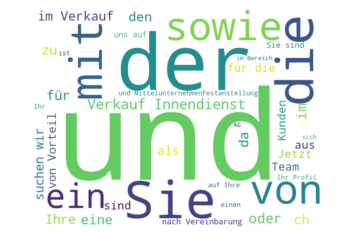

In [247]:
# Create the wordcloud object
wordcloud = WordCloud(background_color='white', 
                      max_words=40, 
                      width=800, 
                      height=600, 
                      margin=0).generate(long_text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### With Stopwords removal

In [248]:
t = long_text.split(' ')
for w in tqdm(t):
    if w in stopwords:
        t.remove(w)

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 27460/35718 [00:02<00:00, 9378.42it/s]


In [249]:
long_text2 = ' '.join(t)
len(long_text2)

254504

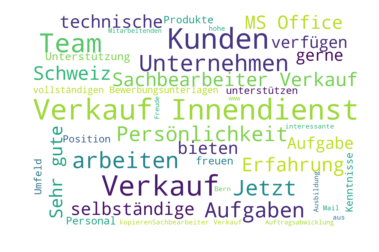

In [250]:
wordcloud = WordCloud(background_color='white', 
                      stopwords={'der', 'the', 'die', 'our', 'in', 
                                 'you', 'Du', 'are', 'wir', 'den',
                                 'Sie', 'to', 'an', 'Als', 'das',
                                 'mit', 'as', 'ein', 'your', 'We',
                                 'jobs', 'ch', 'bei', 'Bewerbung', 'beziehe',
                                 'de', 'eine', 'Für', 'Ihr', 'einem', 'Profil',
                                 'Bereich', 'Herr', 'Frau', 'AG', 'et', 'le',
                                 'Ihre', 'auf', 'un', 'Lohn', 'CHF', 'einen',
                                 'suchen', 'sind', 'au', 'per', 'von', 'la', 'avec',
                                 'im', 'aux', 'en', 'les', 'Unsere', 'und',
                                 'oder', 'sich', 'zu', 'ab', 'haben', 'Haben', 'einer',
                                 'dem', 'div', 'li', 'id', 'class', 'smartEditable',
                                 'Ihnen', 'ist', 'nach', 'Unser', 'uns', 'auch', 'uns',
                                 'Ihrer', 'können', 'Vorteil'},
                      max_words=40, 
                      width=1200, 
                      height=800,
                      margin=0).generate(long_text2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
output_fig = term + '.png'
plt.savefig(output_fig, dpi=400)
plt.show()